# ML Driven Phishing Detector
### Stretch Project by Arnav J
### July - Septemeber 2024

In [1]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# To read the dataset of Spam and not Spam messages
data = pd.read_csv("SMSSpamCollection.txt", sep="\t", names=["label", "message"])

In [3]:
data.head(10) # to read the first 10 values of the data set


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
data.shape #number of values in data set

(5572, 2)

In [5]:
#TESTING
#to check for NULL values
data.isnull().sum()

#to check for duplicate values
data.duplicated().sum()


np.int64(403)

In [6]:
#if there are duplicates, they will be removed
data = data.drop_duplicates()
data.duplicated().sum()

np.int64(0)

## Data Analysis (Step 1)

**Analysing the dataset, to ensure it is effective to train the model**

In [7]:
# Number of messages in the dataset, seperated by whether they are spam or not spam (ham)
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

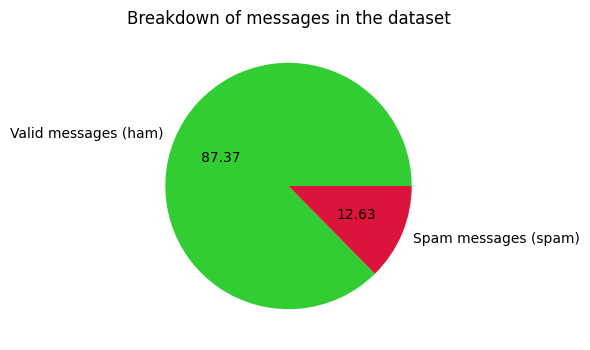

In [8]:
# Visual representation through a Pie Chart of the dataset
plt.figure(figsize=(8, 4)) 

plt.pie(data['label'].value_counts(),labels=['Valid messages (ham)','Spam messages (spam)'],autopct='%0.2f', colors=['limegreen', 'crimson'])
plt.title("Breakdown of messages in the dataset")
plt.show()

In [9]:
data['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
import nltk
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context
nltk.data.path.append(certifi.where())  # Append certifi's certificate path
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
data['num_characters']=data['message'].apply(len)
data.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# For a number of words
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [13]:
data['num_words']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
# For a number of sentences

data['num_sentences']=data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [15]:
# For Ham messages

data[data['label']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
# For Spam messages:

data[data['label']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

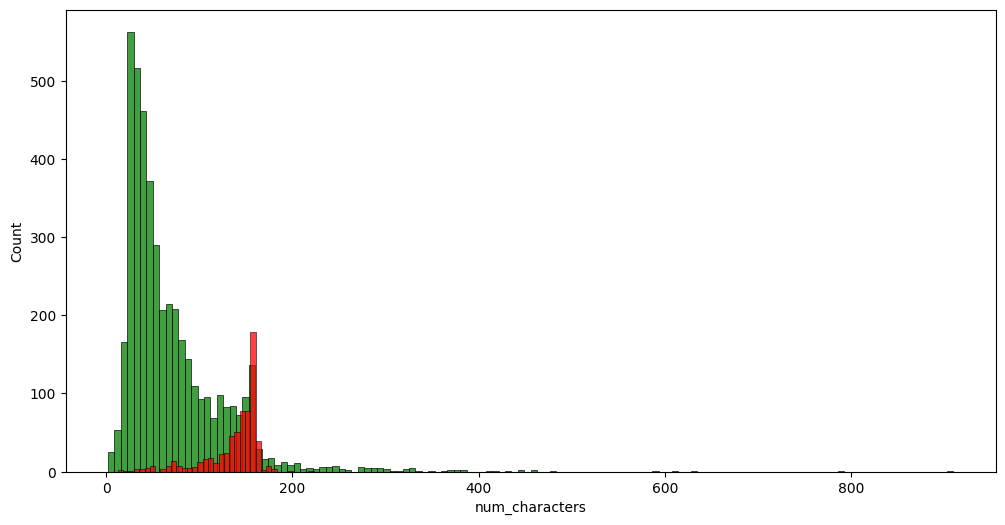

In [17]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(data[data['label']=='ham']['num_characters'],color='green')
sns.histplot(data[data['label']=='spam']['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

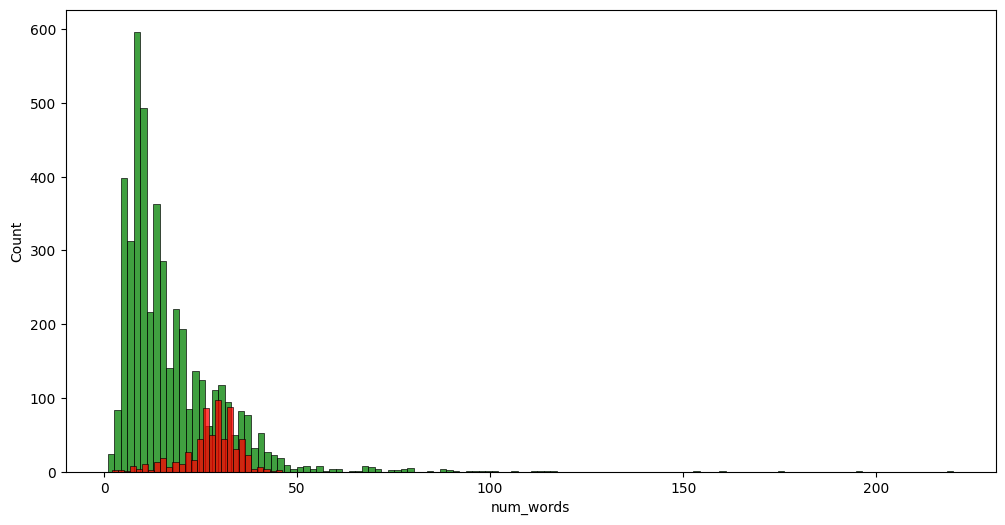

In [18]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(data[data['label']=='ham']['num_words'],color='green')
sns.histplot(data[data['label']=='spam']['num_words'],color='red')

### Word Cloud
**Using wordcloud to getting a clearer understanding of the  most frequent words in the dataset. The aim of the wordcloud is identfying patterns in the valid and spam messages**


In [19]:
from wordcloud import WordCloud

In [20]:
ham_msg_text = data[data.label == 'ham'].message
spam_msg_text = data[data.label == 'spam'].message

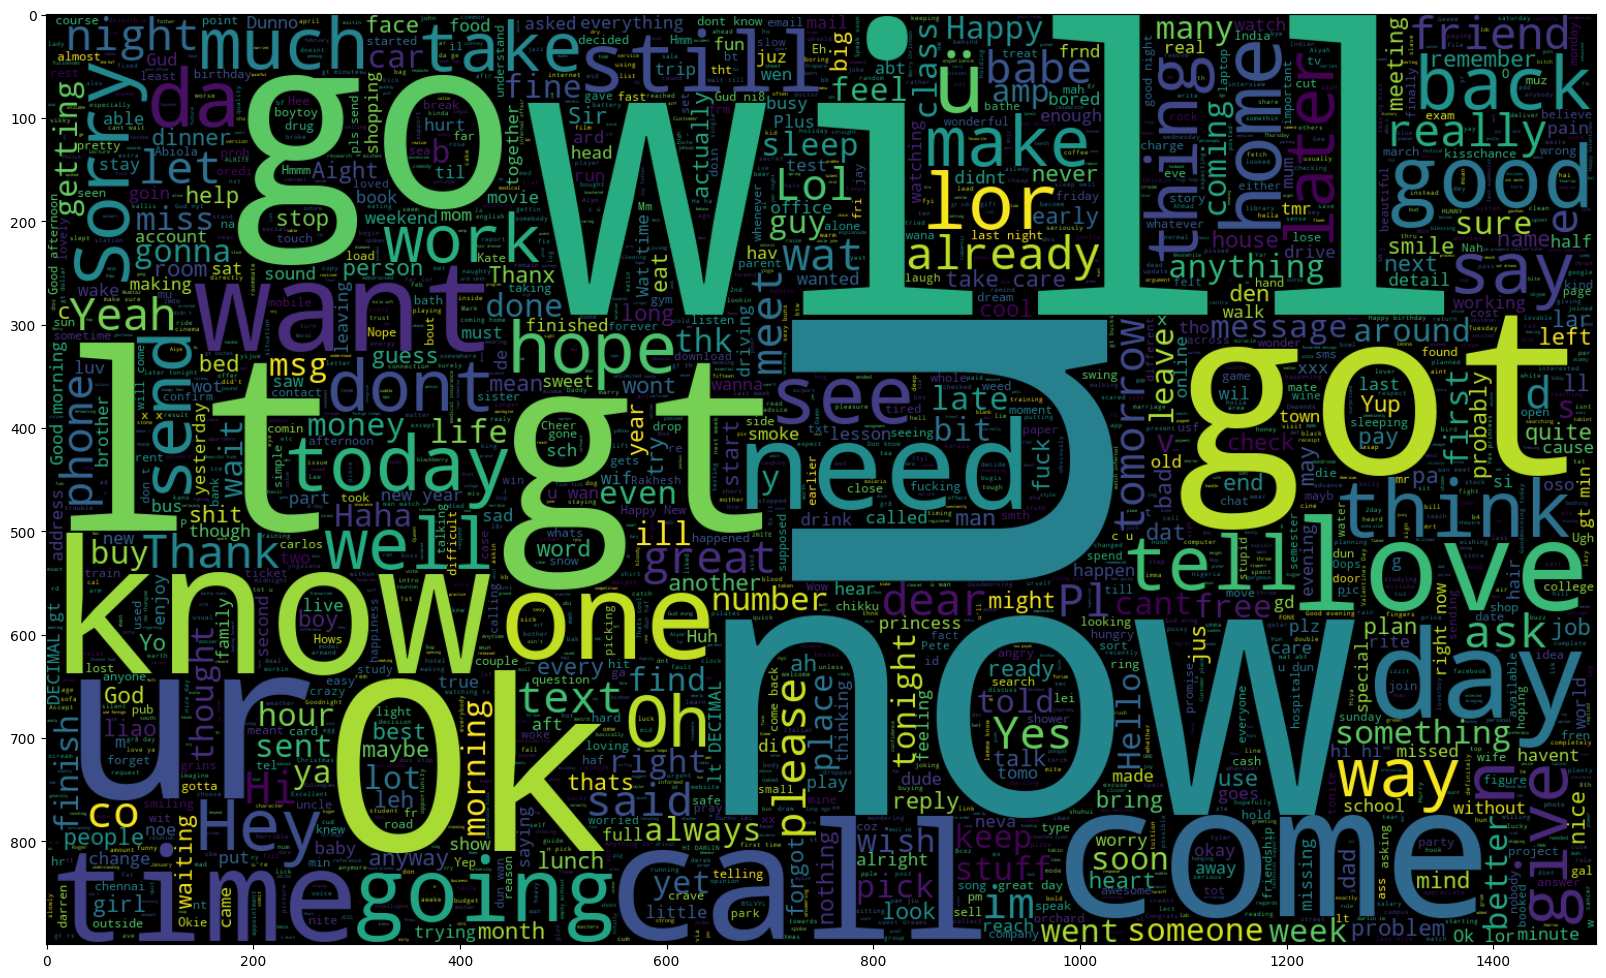

In [21]:
# Word Cloud for Valid Messages

plt.figure(figsize = (20, 22))
wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(ham_msg_text))
plt.imshow(wc, interpolation='bilinear')

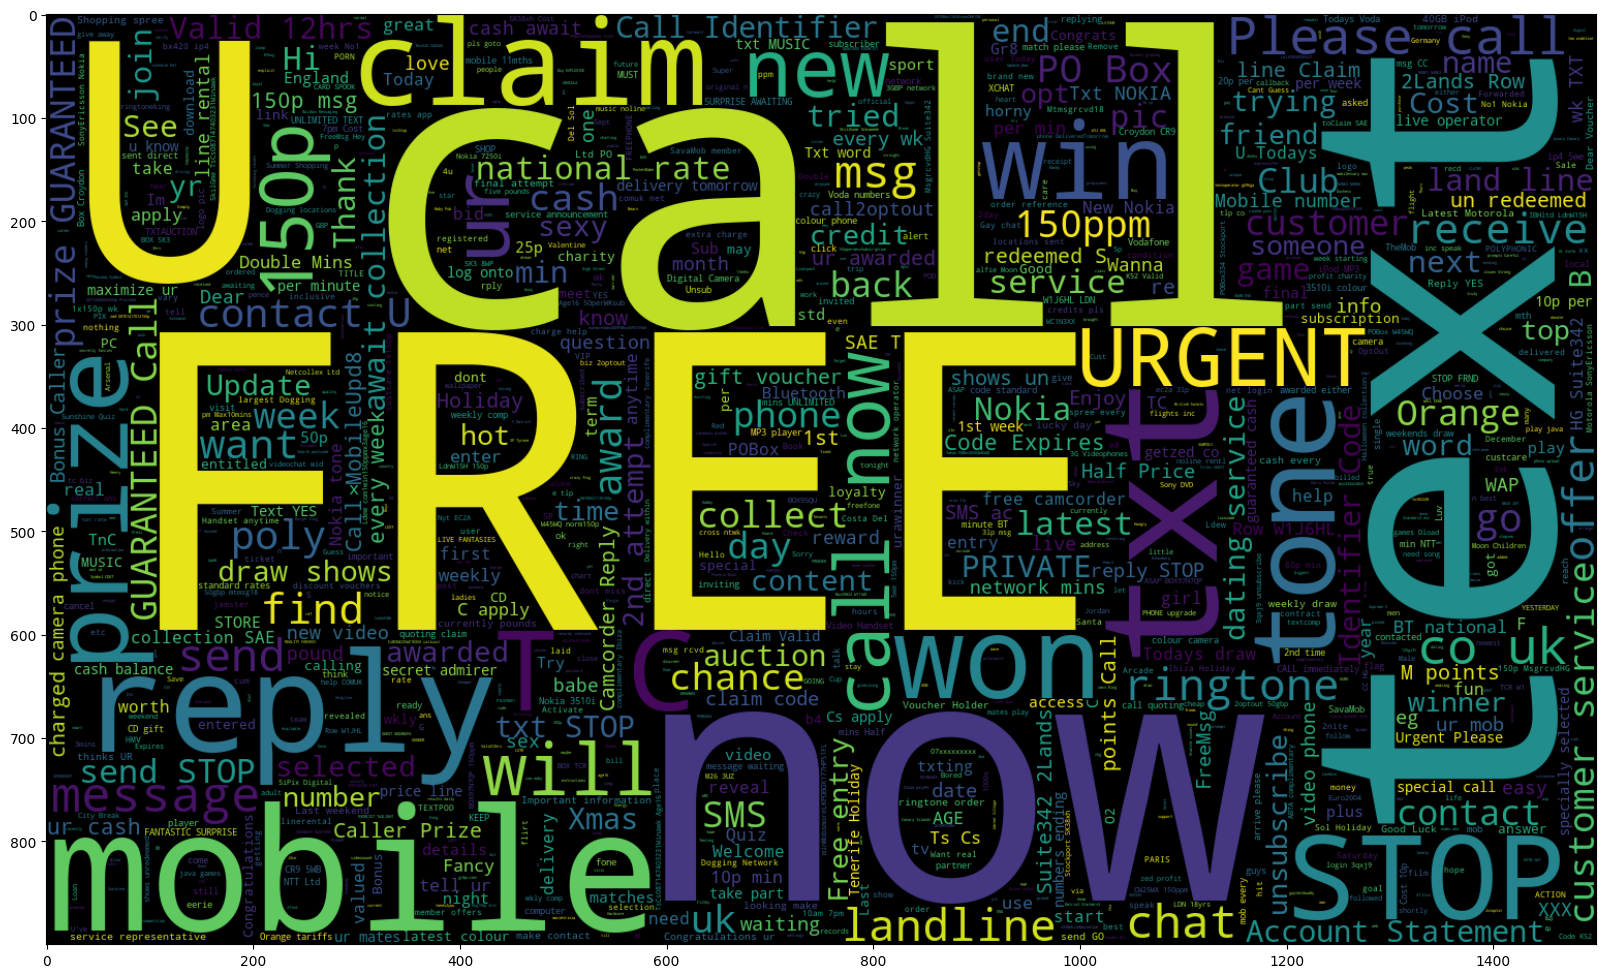

In [22]:
# Word Cloud for Spam Messages
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_msg_text))
plt.imshow(wc, interpolation='bilinear')

## Processing the Data Set (Step 2)

**Removing Punctation, Special Characters and other characters that are not relevant, to effectively read the data**

In [23]:
test_value = data['message'][8]
print(test_value)

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


#### **Removing Punctuation**

In [24]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

data['message'] = data['message'].apply(remove_punc)
print(test_value)

WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.


#### **Removing Special Characters**

In [25]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

data['message'] = data['message'].apply(remove_noise)
data['message'][8]

'WINNER As a valued network customer you have been selected to receivea      prize reward To claim call             Claim code KL    Valid    hours only'

#### **Removing Stopwords**

In [26]:
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
len(sw)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [27]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

data['message'] = data['message'].apply(remove_sws)
data['message'][8]

'winner valued network customer selected receivea prize reward claim call claim code kl valid hours'

#### **Lemmatization**

The process of breaking down a word into its root form. For example, "builds", "building", and "built" can all be reduced to the lemma "build"

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

data['label']=encoder.fit_transform(data['label'])
data = data[['label','message']]
data.head()


,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [29]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

data['message'] = data['message'].apply(lemma)
data.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


#### **Label Encoder** 

To classify the data the “label” section is updated to a binary classifation of either '0' or '1'

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

data['label']=encoder.fit_transform(data['label'])
data = data[['label','message']]
data.head()


,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


## Feature Extraction for Converting Words to Vectors (Step 3)

Using TF-IDF Vectorizer to convert words into vectors


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

x = tf.fit_transform(data['message']).toarray()
y = data['label']

print(x)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

In [34]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

## Model Building & Evaluation (Step 4)

In [35]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
# Creating Naive Bayes Instance
clf = BernoulliNB()

# Fit the data
clf.fit(x_train, y_train)

BernoulliNB()

In [37]:
# Making a prediction
y_pred = clf.predict(x_test)

# Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9864603481624759


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       917
           1       0.94      0.94      0.94       117

    accuracy                           0.99      1034
   macro avg       0.97      0.97      0.97      1034
weighted avg       0.99      0.99      0.99      1034



Text(120.72222222222221, 0.5, 'Truth')

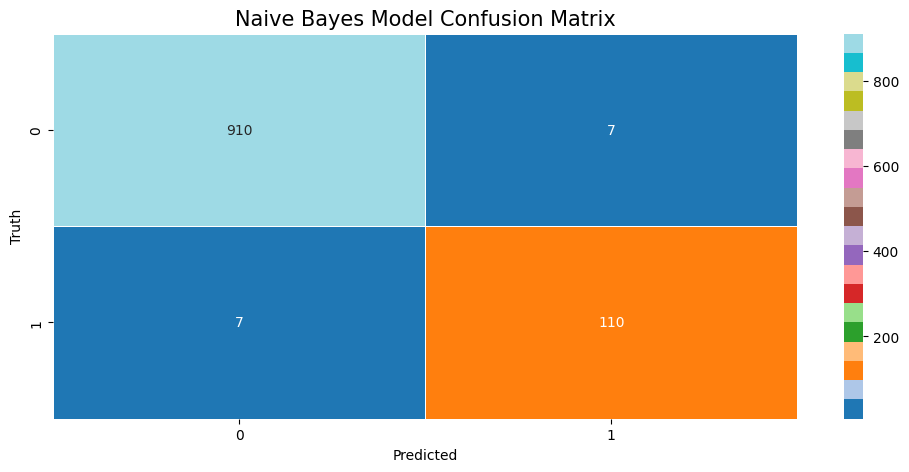

In [39]:
# Plotting the Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Final Model (Step 5)



In [40]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))